<a href="https://colab.research.google.com/github/nilsoncunha/portfolio/blob/master/Analisando_os_dados_do_airbnb_no_Rio_de_Janeiro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Com o carnaval chegando, nada melhor do que saber qual lugar se hospedar. Com isso vamos fazer uma análise dos locais disponíveis no Rio de Janeiro pelo AirBnB. Será que conseguimos aquele lugar bom, bonito e barato? Vamos ver...

Importando os dados

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

from IPython.core.pylabtools import figsize
figsize(12,8)
sns.set(style='darkgrid')

In [0]:
df = pd.read_csv("https://dl.dropbox.com/s/7l9nzemeoqxj9pb/listings.csv?dl=0")

Verificando os dados do dataset

In [0]:
df[10:15]

In [174]:
df.price.dtype

dtype('O')

Como nossa coluna de `price` está como *object*, vamos converte-la e com isso conseguiremos realizar alguns cálculos.





In [0]:
df['price'] = df.price.str.replace('$', '')
df['price'] = df.price.str.replace(',', '')
df['price'] = df.price.astype(float)

In [0]:
df['neighbourhood'].value_counts()

Qual seria a média de preço dos bairros?

In [218]:
bairro = df['neighbourhood'].groupby(df['price'])
bairro.value_counts()

price    neighbourhood           
0.0      Copacabana                  6
         Barra da Tijuca             1
17.0     Glória                      1
29.0     Copacabana                  1
         Recreio dos Bandeirantes    1
                                    ..
40001.0  Barra da Tijuca             1
41982.0  Barra da Tijuca             3
         Copacabana                  1
         Laranjeiras                 1
         Santa Teresa                1
Name: neighbourhood, Length: 5441, dtype: int64

In [236]:
price_20max = df.price.sort_values(ascending=False)
price_20max.value_counts()
#sns.barplot(data=df, y='neighbourhood', x='price')

202.0      1323
151.0      1262
298.0      1252
252.0      1206
101.0       971
           ... 
7561.0        1
40001.0       1
2909.0        1
3489.0        1
2225.0        1
Name: price, Length: 856, dtype: int64

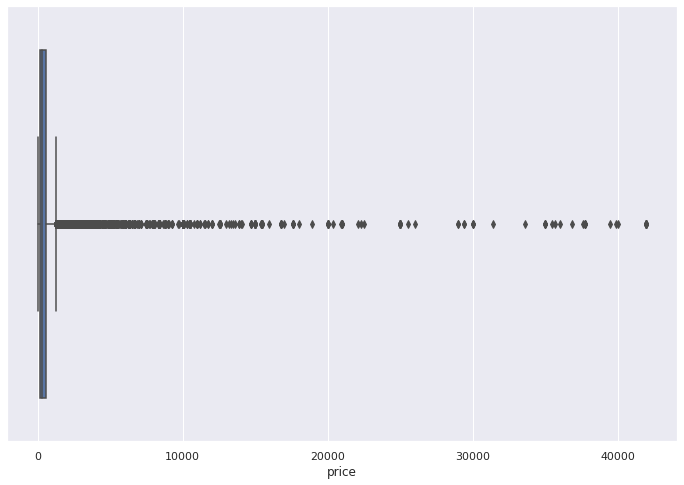

In [206]:
sns.boxplot(df.price)

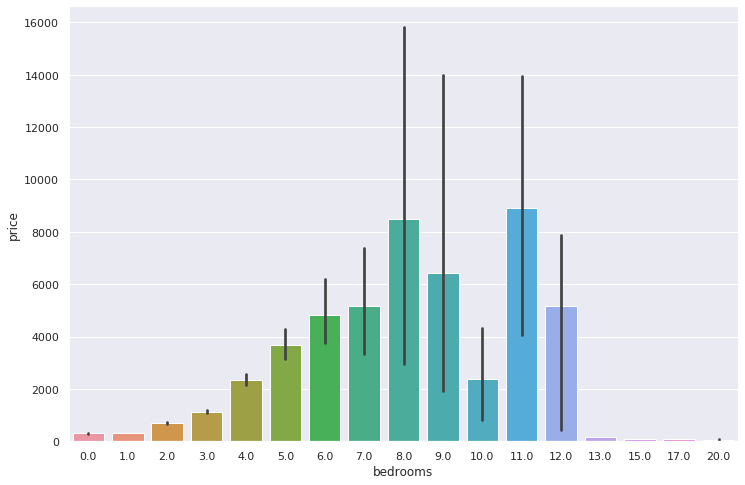

In [184]:
sns.barplot(data=df, x='bedrooms', y='price')

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32]),
 <a list of 33 Text xticklabel objects>)

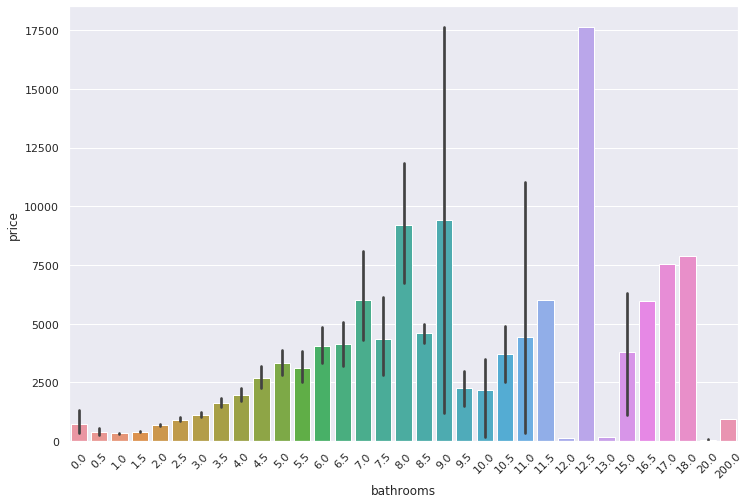

In [188]:
sns.barplot(data=df, x='bathrooms', y='price')
plt.xticks(rotation=45)

In [193]:
df[df.bathrooms > 100][['id', 'bathrooms']]

,id,bathrooms
30615,37559908,200.0


|english	|	portuguese|
|---	|	---|
id',	|	Eu iria',
 'listing url',	|	 'URL da lista',
 'scrape id',	|	 'ID do raspar',
 'last scraped',	|	 'último raspado',
 'name',	|	 'nome',
 'summary',	|	 'resumo',
 'space',	|	 'espaço',
 'description',	|	 'descrição',
 'experiences offered',	|	 'experiências oferecidas',
 'neighborhood overview',	|	 'visão geral do bairro',
 'notes',	|	 'notas',
 'transit',	|	 'transito',
 'access',	|	 'Acesso',
 'interaction',	|	 'interação',
 'house rules',	|	 'regras da casa',
 'thumbnail url',	|	 'URL da miniatura',
 'medium url',	|	 'URL médio',
 'picture url',	|	 'URL da imagem',
 'xl picture url',	|	 'URL da imagem xl',
 'host id',	|	 'ID do host',
 'host url',	|	 'URL do host',
 'host name',	|	 'nome de anfitrião',
 'host since',	|	 'host desde',
 'host location',	|	 'local do host',
 'host about',	|	 'host about',
 'host response time',	|	 'tempo de resposta do host',
 'host response rate',	|	 'taxa de resposta do host',
 'host acceptance rate',	|	 'taxa de aceitação do host',
 'host is superhost',	|	 'host é superhost',
 'host thumbnail url',	|	 'URL da miniatura do host',
 'host picture url',	|	 'URL da imagem do host',
 'host neighbourhood',	|	 'bairro anfitrião',
 'host listings count',	|	 'contagem de listagens de hosts',
 'host total listings count',	|	 'contagem total de listagens de hosts',
 'host verifications',	|	 'verificações de host',
 'host has profile pic',	|	 'host tem foto do perfil',
 'host identity verified',	|	 'identidade do host verificada',
 'street',	|	 'rua',
 'neighbourhood',	|	 'Vizinhança',
 'neighbourhood cleansed',	|	 'bairro limpo',
 'neighbourhood group cleansed',	|	 'grupo de bairro limpo',
 'city',	|	 'cidade',
 'state',	|	 'Estado',
 'zipcode',	|	 'Código postal',
 'market',	|	 'mercado',
 'smart location',	|	 'localização inteligente',
 'country code',	|	 'Código do país',
 'country',	|	 'país',
 'latitude',	|	 'latitude',
 'longitude',	|	 'longitude',
 'is location exact',	|	 'é a localização exata',
 'property type',	|	 'Tipo de Propriedade',
 'room type',	|	 'tipo de sala',
 'accommodates',	|	 'acomoda',
 'bathrooms',	|	 'casas de banho',
 'bedrooms',	|	 'quartos de dormir',
 'beds',	|	 'camas',
 'bed type',	|	 'tipo de cama',
 'amenities',	|	 'Facilidades',
 'square feet',	|	 'pés quadrados',
 'price',	|	 'preço',
 'weekly price',	|	 'preço semanal',
 'monthly price',	|	 'preço mensal',
 'security deposit',	|	 'depósito de segurança',
 'cleaning fee',	|	 'taxa de limpeza',
 'guests included',	|	 'convidados incluídos',
 'extra people',	|	 'pessoas extras',
 'minimum nights',	|	 'noites mínimas',
 'maximum nights',	|	 'noites máximas',
 'minimum minimum nights',	|	 'noites mínimas mínimas',
 'maximum minimum nights',	|	 'noites mínimas máximas',
 'minimum maximum nights',	|	 'noites mínimas máximas',
 'maximum maximum nights',	|	 'noites máximas máximas',
 'minimum nights avg ntm',	|	 'noites mínimas médias ntm',
 'maximum nights avg ntm',	|	 'noites máximas médias ntm',
 'calendar updated',	|	 'calendário atualizado',
 'has availability',	|	 'tem disponibilidade',
 'availability 30',	|	 'disponibilidade 30',
 'availability 60',	|	 'disponibilidade 60',
 'availability 90',	|	 'disponibilidade 90',
 'availability 365',	|	 'disponibilidade 365',
 'calendar last scraped',	|	 'último calendário raspado',
 'number of reviews',	|	 'número de comentários',
 'number of reviews ltm',	|	 'número de avaliações ltm',
 'first review',	|	 'primeira revisão',
 'last review',	|	 'última revisão',
 'review scores rating',	|	 'classificação das pontuações de revisão',
 'review scores accuracy',	|	 'precisão das pontuações de revisão',
 'review scores cleanliness',	|	 'avaliação pontua limpeza',
 'review scores checkin',	|	 'pontuações de revisão checkin',
 'review scores communication',	|	 'comunicação das pontuações de revisão',
 'review scores location',	|	 'local das pontuações da revisão',
 'review scores value',	|	 'valor das pontuações de revisão',
 'requires license',	|	 'requer licença',
 'license',	|	 'licença',
 'jurisdiction names',	|	 'nomes de jurisdição',
 'instant bookable',	|	 'reserva instantânea',
 'is business travel ready',	|	 "as viagens de negócios estão prontas",
 'cancellation policy',	|	 'política de cancelamento',
 'require guest profile picture',	|	 'exigir foto do perfil do hóspede',
 'require guest phone verification',	|	 'exigir verificação por telefone de convidado',
 'calculated host listings count',	|	 'contagem calculada de listagens de hosts',
 'calculated host listings count entire homes',	|	 'listagens de hosts calculadas contam casas inteiras',
 'calculated host listings count private rooms',  	|	 'listagens de hosts calculadas contam salas privadas',
 'calculated host listings count shared rooms',  	|	 'listagens de hosts calculadas contam quartos compartilhados',
 'reviews per month'                             	|	 'análises por mês'
		